In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_grouped_bars(ax, xlabels, ys, legend_names=[], xlabel=None, ylabel=None, title=None, hide_xticks=False):
    num_bars_in_group = len(ys)
    gap_between_bargroups = 0.35  # where 1.0 means the distance between the first bar of a group to the first of the next
    gap_between_bars_in_group = 0.01
    
    bar_width = ((1.0 - gap_between_bargroups) + gap_between_bars_in_group) / num_bars_in_group
    
    #colors = ['b', 'g', 'r', 'y', 'gray']
    colors = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0'] * 5  # TODO: more colors
    # assert len(ys) <= len(colors)
    X = np.array(range(len(xlabels)))
    # print("X_", X)
    
    for i, (y, c) in enumerate(zip(ys, colors)):
        ax.bar(X + i*bar_width, y, color=c, width=bar_width - gap_between_bars_in_group, align='center')
    if not hide_xticks:
        # xpos = [r + bar_width * (num_bars_in_group - 1) / len(X) for r in range(len(X))]
        # print("bar_width", bar_width)
        group_width = num_bars_in_group * bar_width # + (num_bars_in_group - 1) * gap_between_bars_in_group
        # print("group_width", group_width)
        xpos = X + (bar_width * (num_bars_in_group - 1))/2
        # xpos = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0]
        # print("xpos", xpos)
        plt.xticks(xpos, xlabels)
        # plt.xticks(xpos)
        
        group_width *= 1.1
        min_x = min(xpos) - (group_width / 2)
        max_x = max(xpos) + (group_width / 2)
        # ax.set_xlim(min_x, max_x)
    if legend_names:
        ax.legend(legend_names)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if title:
        ax.set_title(title)
    # return ax
    # plt.show()

X_ [0 1]
bar_width 0.22
group_width 0.66
xpos [0.22 1.22]
X_ [0 1 2 3]
X_ [0 1 2 3]


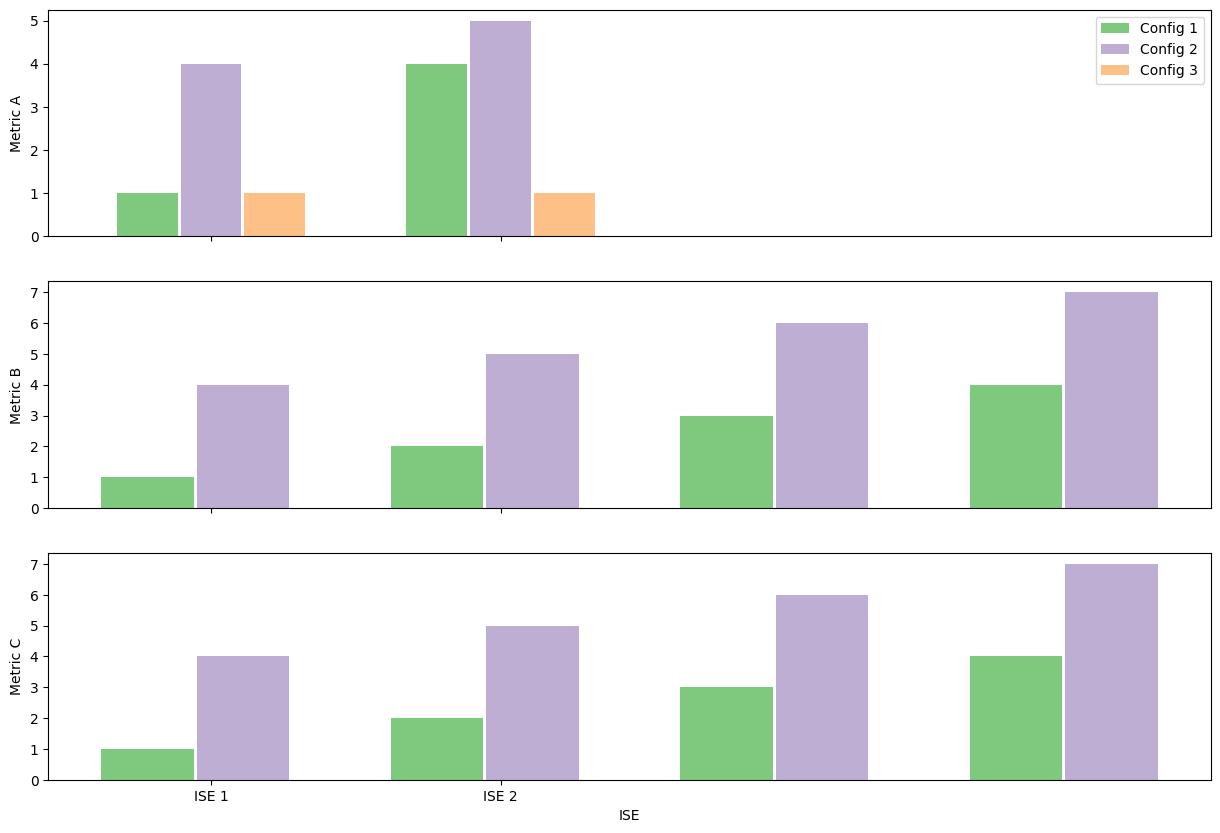

In [174]:
WIDTH, HEIGHT = (10, 15)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(HEIGHT, WIDTH))
plot_grouped_bars(axs[0], ["ISE 1", "ISE 2"], [[1, 4], [4, 5], [1, 1]], ylabel="Metric A", legend_names=["Config 1", "Config 2", "Config 3"])
plot_grouped_bars(axs[1], ["ISE 1", "ISE 2", "ISE 3", "ISE 4"], [[1, 2, 3, 4], [4, 5, 6, 7]], ylabel="Metric B", hide_xticks=True)
plot_grouped_bars(axs[2], ["ISE 1", "ISE 2", "ISE 3", "ISE 4"], [[1, 2, 3, 4], [4, 5, 6, 7]], xlabel="ISE", ylabel="Metric C", hide_xticks=True)
# plot_grouped_bars(axs[2], ["ISE 1", "ISE 2", "ISE 3", "ISE 4"], [[1, 2, 3, 4], [4, 5, 6, 7]], xlabel="ISE", ylabel="Metric C", hide_xticks=True)

In [80]:
data = [
    {"ise": "ISE 1", "config": "Config 1", "num_custom_instrs": 10, "ecoding_footprint": 0.05, "avg_runtime_reduction": 0.12},
    {"ise": "ISE 1", "config": "Config 2", "num_custom_instrs": 15, "ecoding_footprint": 0.06, "avg_runtime_reduction": 0.10},
    {"ise": "ISE 2", "config": "Config 1", "num_custom_instrs": 30, "ecoding_footprint": 0.07, "avg_runtime_reduction": 0.12},
    {"ise": "ISE 2", "config": "Config 2", "num_custom_instrs": 24, "ecoding_footprint": 0.08, "avg_runtime_reduction": 0.10},
    {"ise": "ISE 3", "config": "Config 1", "num_custom_instrs": 42, "ecoding_footprint": 0.09, "avg_runtime_reduction": 0.12},
    {"ise": "ISE 3", "config": "Config 2", "num_custom_instrs": 11, "ecoding_footprint": 0.10, "avg_runtime_reduction": 0.10},
    {"ise": "ISE 4", "config": "Config 1", "num_custom_instrs": 50, "ecoding_footprint": 0.11, "avg_runtime_reduction": 0.12},
    {"ise": "ISE 4", "config": "Config 2", "num_custom_instrs": 40, "ecoding_footprint": 0.12, "avg_runtime_reduction": 0.10},
]

df = pd.DataFrame(data)

df

,ise,config,num_custom_instrs,ecoding_footprint,avg_runtime_reduction
0,ISE 1,Config 1,10,0.05,0.12
1,ISE 1,Config 2,15,0.06,0.10
2,ISE 2,Config 1,30,0.07,0.12
3,ISE 2,Config 2,24,0.08,0.10
4,ISE 3,Config 1,42,0.09,0.12
5,ISE 3,Config 2,11,0.10,0.10
6,ISE 4,Config 1,50,0.11,0.12
7,ISE 4,Config 2,40,0.12,0.10


In [8]:
ISEs = df["ise"].unique()
CFGs = df["config"].unique()

full_index = pd.MultiIndex.from_product([ISEs, CFGs], names=['ise', 'config'])

df_full = df.set_index(['ise', 'config']).reindex(full_index)

df_full = df_full.reset_index()
df_full

,ise,config,benchmark,datetime,experiment,cfg,comment,status,missing,time_bench_0,...,fpga_syn_luts_isax_sharing_factor,fpga_syn_ffs_total_sharing_factor,fpga_syn_ffs_isax_sharing_factor,fpga_syn_brams_total_sharing_factor,fpga_syn_brams_isax_sharing_factor,fpga_syn_dsps_total_sharing_factor,fpga_syn_dsps_isax_sharing_factor,cfg_str,rel_run_instrs_reduction,rel_run_code_reduction
0,ISE 0 (embench/nettle-aes),Config 0,embench/nettle-aes,20250404T105828,isaac-demo-embench/nettle-aes-20250404T105828,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.435,...,1.166667,1.010652,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.261450,0.040264
1,ISE 0 (embench/nettle-aes),Config 1,embench/nettle-aes,20250404T101904,isaac-demo-embench/nettle-aes-20250404T101904,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.448,...,1.000000,1.008677,NaN,NaN,NaN,1.0,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.261450,0.040264
2,ISE 0 (embench/nettle-aes),Config 2,embench/nettle-aes,20250404T094820,isaac-demo-embench/nettle-aes-20250404T094820,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv,3.400,...,1.000000,1.000000,NaN,1.0,NaN,1.0,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.261450,0.040264
3,ISE 1 (embench/md5sum),Config 0,embench/md5sum,20250404T125257,isaac-demo-embench/md5sum-20250404T125257,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.247,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.025869,0.001052
4,ISE 1 (embench/md5sum),Config 1,embench/md5sum,20250404T121031,isaac-demo-embench/md5sum-20250404T121031,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.449,...,1.000000,1.000000,NaN,NaN,NaN,1.0,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.025869,0.001052
5,ISE 1 (embench/md5sum),Config 2,embench/md5sum,20250404T113750,isaac-demo-embench/md5sum-20250404T113750,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv,3.381,...,1.000000,1.000000,NaN,1.0,NaN,1.0,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.025869,0.001052
6,ISE 2 (embench/edn),Config 0,embench/edn,20250404T090411,isaac-demo-embench/edn-20250404T090411,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.354,...,1.000000,0.997337,NaN,NaN,NaN,1.0,1.0,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.063636,0.017746
7,ISE 2 (embench/edn),Config 1,embench/edn,20250404T082439,isaac-demo-embench/edn-20250404T082439,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.207,...,1.000000,0.997831,NaN,NaN,NaN,1.0,1.0,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.063636,0.017746
8,ISE 2 (embench/edn),Config 2,embench/edn,20250404T075727,isaac-demo-embench/edn-20250404T075727,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv,3.769,...,1.000000,1.000000,NaN,1.0,NaN,1.0,1.0,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.063636,0.017746
9,ISE 3 (embench/crc32),Config 0,embench/crc32,20250404T145135,isaac-demo-embench/crc32-20250404T145135,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.294,...,1.266667,1.009321,NaN,NaN,NaN,1.0,1.0,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.217304,0.007634


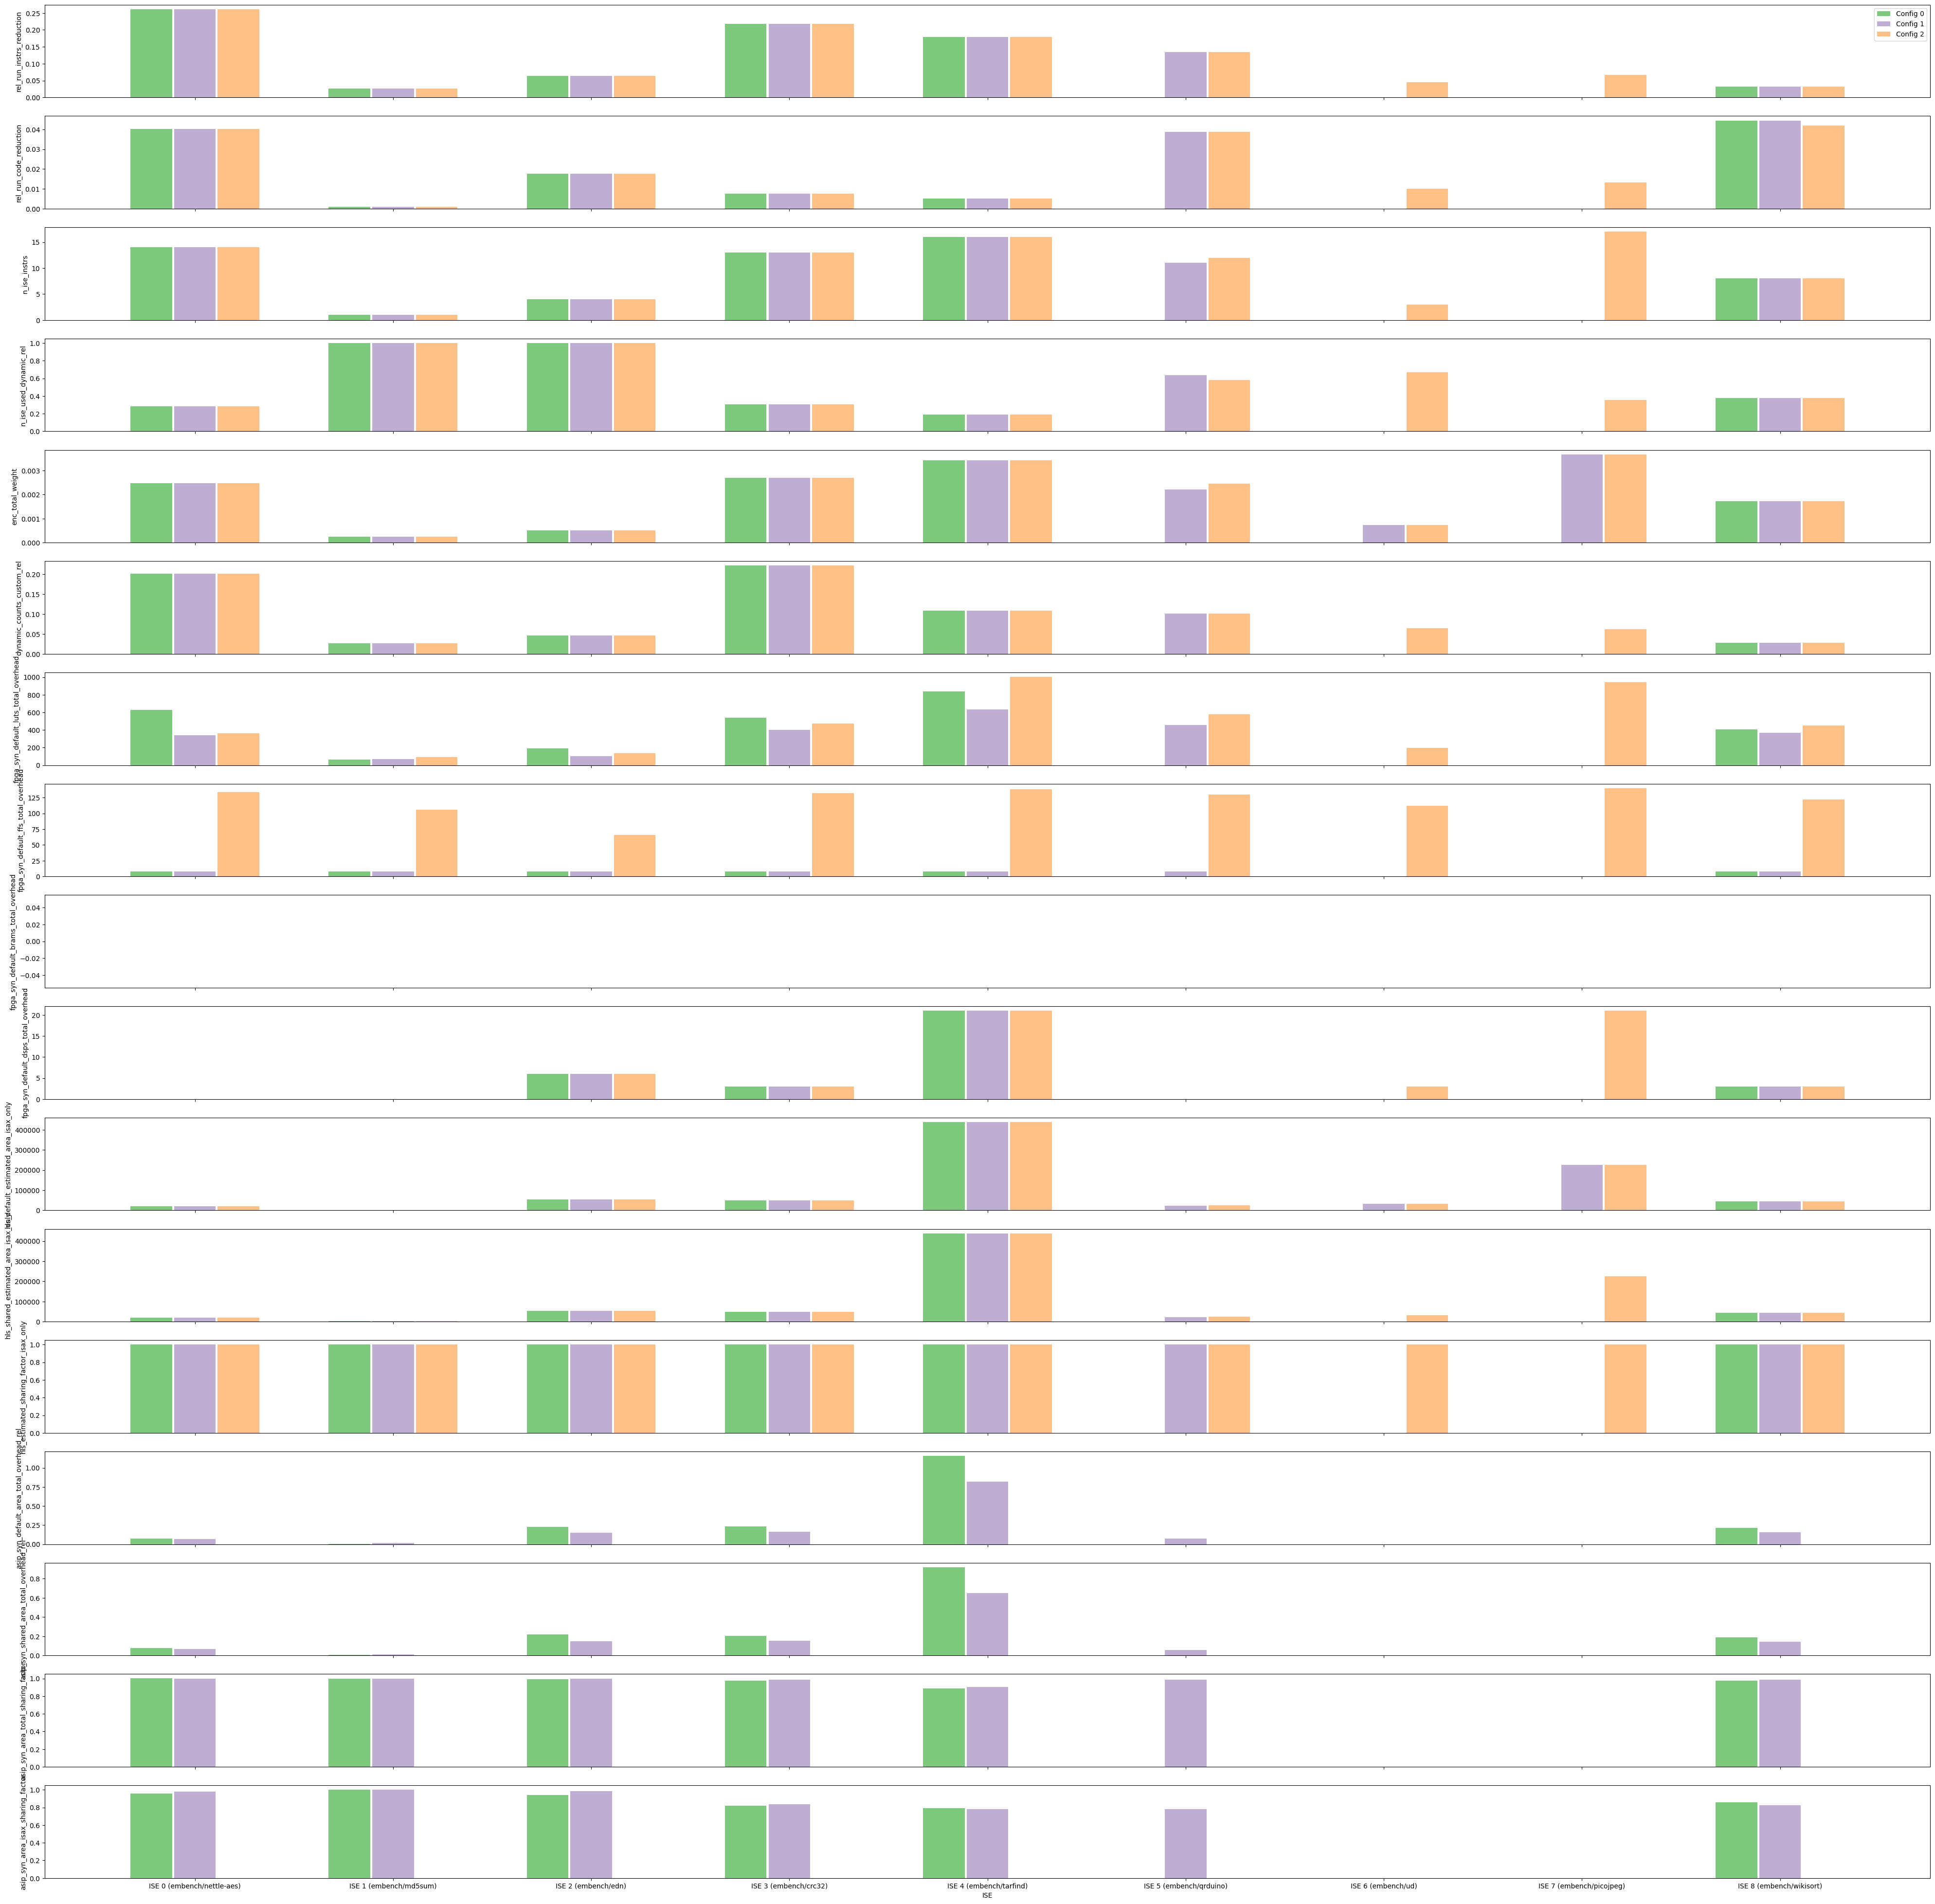

In [12]:
WIDTH, HEIGHT = (50, 50)

PRE = ["ise", "config"]
METRICS = [
    "rel_run_instrs_reduction", "rel_run_code_reduction",
    "n_ise_instrs", "n_ise_used_dynamic_rel",
    "enc_total_weight",
    # "time_total",
    # "compare_others_num_isax_progs_good_rel", "compare_others_total_speedup",
    "dynamic_counts_custom_rel", 
    "fpga_syn_default_luts_total_overhead", "fpga_syn_default_ffs_total_overhead", "fpga_syn_default_brams_total_overhead", "fpga_syn_default_dsps_total_overhead",
    "hls_default_estimated_area_isax_only", "hls_shared_estimated_area_isax_only", "hls_estimated_sharing_factor_isax_only",
    "asip_syn_default_area_total_overhead_rel", "asip_syn_shared_area_total_overhead_rel", "asip_syn_area_total_sharing_factor", "asip_syn_area_isax_sharing_factor",
]

num_rows = len(METRICS)
num_cols = 1

fig, axs = plt.subplots(num_rows, num_cols, sharex=True, figsize=(HEIGHT, WIDTH))

if num_rows == 1:
    axs = [axs]

swap = False
# swap = True

for i, metric in enumerate(METRICS):
    plot_data = [[df_full[(df_full["ise"] == ise) & (df_full["config"] == cfg)][metric].fillna(0).iloc[0]  for ise in ISEs] for cfg in CFGs]
    if swap:
        # print("plot_data", plot_data)
        plot_data = [[plot_data[jj][ii] for jj in range(len(plot_data))] for ii in range(len(plot_data[0]))]
        # print("plot_data_", plot_data)
    # print("plot_data", plot_data)
    X = ISEs if not swap else CFGs
    xlabel = "ISE" if not swap else "CFG"
    # print("X", X)
    legend_names = list(CFGs) if not swap else list(ISEs)
    if i == 0:
        plot_grouped_bars(axs[i], X, plot_data, ylabel=metric, legend_names=legend_names)
    elif i == len(METRICS) - 1:
        plot_grouped_bars(axs[i], X, plot_data, xlabel=xlabel, ylabel=metric, hide_xticks=True)
        # axs[i].set_xlim(-1, 2)
    else:
        plot_grouped_bars(axs[i], X, plot_data, ylabel=metric, hide_xticks=False)


In [3]:
experiments_csv = "~/all_experiments.csv"
experiments_df = pd.read_csv(experiments_csv)
import ast
experiments_df["cfg"] = experiments_df["cfg"].apply(ast.literal_eval)
experiments_df["cfg_str"] = experiments_df["cfg"].apply(lambda x: str(dict(sorted(x.items()))))

# TODO: generate
experiments_df["rel_run_instrs_reduction"] = -experiments_df["rel_run_instrs"] + 1
experiments_df["rel_run_code_reduction"] = -experiments_df["rel_run_code"] + 1

experiments_df

,benchmark,datetime,experiment,cfg,comment,status,missing,time_bench_0,time_isaac_0_analyze,time_isaac_0_load,...,fpga_syn_luts_isax_sharing_factor,fpga_syn_ffs_total_sharing_factor,fpga_syn_ffs_isax_sharing_factor,fpga_syn_brams_total_sharing_factor,fpga_syn_brams_isax_sharing_factor,fpga_syn_dsps_total_sharing_factor,fpga_syn_dsps_isax_sharing_factor,cfg_str,rel_run_instrs_reduction,rel_run_code_reduction
0,example/load_filter,20250325T113340,isaac-demo-example/load_filter-20250325T113340,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,ise_potential.pkl;total_encoding_metrics.csv;o...,3.225,11.677,3.471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE'...",NaN,NaN
1,example/basic_hash,20250325T121318,isaac-demo-example/basic_hash-20250325T121318,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv;ise_potentia...,3.114,10.400,2.968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE'...",0.215126,0.000000
2,embench/nettle-aes,20250404T105828,isaac-demo-embench/nettle-aes-20250404T105828,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.435,109.124,29.634,...,1.166667,1.010652,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.261450,0.040264
3,embench/nettle-aes,20250325T134029,isaac-demo-embench/nettle-aes-20250325T134029,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,hls_selected_schedule_metrics.csv;metrics.csv;...,3.771,105.035,29.634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE'...",0.260318,0.040264
4,embench/nettle-aes,20250404T101904,isaac-demo-embench/nettle-aes-20250404T101904,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.448,105.769,29.513,...,1.000000,1.008677,NaN,NaN,NaN,1.0,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.261450,0.040264
5,embench/nettle-aes,20250404T094820,isaac-demo-embench/nettle-aes-20250404T094820,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv,3.400,109.823,29.680,...,1.000000,1.000000,NaN,1.0,NaN,1.0,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.261450,0.040264
6,embench/md5sum,20250404T125257,isaac-demo-embench/md5sum-20250404T125257,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.247,58.674,17.722,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.025869,0.001052
7,embench/md5sum,20250404T121031,isaac-demo-embench/md5sum-20250404T121031,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.449,58.845,17.872,...,1.000000,1.000000,NaN,NaN,NaN,1.0,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.025869,0.001052
8,embench/md5sum,20250404T113750,isaac-demo-embench/md5sum-20250404T113750,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv,3.381,58.488,18.002,...,1.000000,1.000000,NaN,1.0,NaN,1.0,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.025869,0.001052
9,embench/st,20250326T145318,isaac-demo-embench/st-20250326T145318,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...","File ""/work/git/isaac-demo/memgraph_experime...",incomplete,overlaps.csv;ise_potential.pkl;run_compare_oth...,3.011,14.913,3.445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE'...",NaN,NaN


In [4]:
# EXPs = ["isaac-demo-embench/md5sum-20250326T131843", "isaac-demo-embench/crc32-20250326T141711"]

# EXPs = list(experiments_df[~pd.isna(experiments_df["rel_run_instrs"])]["experiment"])
EXPs = list(experiments_df[experiments_df["hls_default_estimated_area_isax_only"] > 0]["experiment"])
EXPs

['isaac-demo-embench/nettle-aes-20250404T105828',
 'isaac-demo-embench/nettle-aes-20250404T101904',
 'isaac-demo-embench/nettle-aes-20250404T094820',
 'isaac-demo-embench/md5sum-20250404T125257',
 'isaac-demo-embench/md5sum-20250404T121031',
 'isaac-demo-embench/md5sum-20250404T113750',
 'isaac-demo-embench/edn-20250404T090411',
 'isaac-demo-embench/edn-20250404T082439',
 'isaac-demo-embench/edn-20250404T075727',
 'isaac-demo-embench/crc32-20250404T133523',
 'isaac-demo-embench/crc32-20250404T145135',
 'isaac-demo-embench/crc32-20250404T141038',
 'isaac-demo-embench/tarfind-20250404T170729',
 'isaac-demo-embench/tarfind-20250404T160412',
 'isaac-demo-embench/tarfind-20250404T162517',
 'isaac-demo-embench/qrduino-20250404T223352',
 'isaac-demo-embench/qrduino-20250404T220348',
 'isaac-demo-embench/ud-20250404T180200',
 'isaac-demo-embench/ud-20250404T182349',
 'isaac-demo-embench/picojpeg-20250404T193630',
 'isaac-demo-embench/picojpeg-20250404T185915',
 'isaac-demo-embench/wikisort-202

In [5]:
filtered_df = experiments_df[experiments_df["experiment"].isin(EXPs)].reset_index(drop=True)
# filtered_df["ise"] = filtered_df.index.map(lambda x: f"ISE {x}")
# ise_map = 
# filtered_df["config"] = "Config 0"

ISEs = list(filtered_df["benchmark"].unique())
ise_map = {f"ISE {i} ({benchmark})": benchmark for i, benchmark in enumerate(ISEs)}

# filtered_df["cfg_str_datetime"] = filtered_df["cfg_str"] + " || " + filtered_df["datetime"]
# CFGs = list(filtered_df.groupby(["cfg_str", "datetime"]).groups.keys())
CFGs = list(filtered_df["cfg_str"].unique())
# print("a", CFGs)
# config_map = {f"Config {i} ({cfg_datetime[1]})": cfg_datetime for i, cfg_datetime in enumerate(CFGs)}
config_map = {f"Config {i}": cfg for i, cfg in enumerate(CFGs)}

# filtered_df["config"] = filtered_df[["cfg_str", "datetime"]].apply(lambda x: list(config_map.keys())[CFGs.index((x[0], x[1]))], axis=1) # list(config_map.keys())[CFGs.index((x["cfg_str"], x["datetime"]))])
filtered_df["config"] = filtered_df["cfg_str"].apply(lambda x: list(config_map.keys())[CFGs.index(x)])
filtered_df["ise"] = filtered_df["benchmark"].apply(lambda x: list(ise_map.keys())[ISEs.index(x)])

filtered_df

,benchmark,datetime,experiment,cfg,comment,status,missing,time_bench_0,time_isaac_0_analyze,time_isaac_0_load,...,fpga_syn_ffs_isax_sharing_factor,fpga_syn_brams_total_sharing_factor,fpga_syn_brams_isax_sharing_factor,fpga_syn_dsps_total_sharing_factor,fpga_syn_dsps_isax_sharing_factor,cfg_str,rel_run_instrs_reduction,rel_run_code_reduction,config,ise
0,embench/nettle-aes,20250404T105828,isaac-demo-embench/nettle-aes-20250404T105828,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.435,109.124,29.634,...,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.261450,0.040264,Config 0,ISE 0 (embench/nettle-aes)
1,embench/nettle-aes,20250404T101904,isaac-demo-embench/nettle-aes-20250404T101904,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.448,105.769,29.513,...,NaN,NaN,NaN,1.0,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.261450,0.040264,Config 1,ISE 0 (embench/nettle-aes)
2,embench/nettle-aes,20250404T094820,isaac-demo-embench/nettle-aes-20250404T094820,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv,3.400,109.823,29.680,...,NaN,1.0,NaN,1.0,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.261450,0.040264,Config 2,ISE 0 (embench/nettle-aes)
3,embench/md5sum,20250404T125257,isaac-demo-embench/md5sum-20250404T125257,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.247,58.674,17.722,...,NaN,NaN,NaN,NaN,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.025869,0.001052,Config 0,ISE 1 (embench/md5sum)
4,embench/md5sum,20250404T121031,isaac-demo-embench/md5sum-20250404T121031,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.449,58.845,17.872,...,NaN,NaN,NaN,1.0,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.025869,0.001052,Config 1,ISE 1 (embench/md5sum)
5,embench/md5sum,20250404T113750,isaac-demo-embench/md5sum-20250404T113750,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv,3.381,58.488,18.002,...,NaN,1.0,NaN,1.0,NaN,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.025869,0.001052,Config 2,ISE 1 (embench/md5sum)
6,embench/edn,20250404T090411,isaac-demo-embench/edn-20250404T090411,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.354,103.323,30.740,...,NaN,NaN,NaN,1.0,1.0,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.063636,0.017746,Config 0,ISE 2 (embench/edn)
7,embench/edn,20250404T082439,isaac-demo-embench/edn-20250404T082439,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,ok,NaN,3.207,101.851,31.225,...,NaN,NaN,NaN,1.0,1.0,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.063636,0.017746,Config 1,ISE 2 (embench/edn)
8,embench/edn,20250404T075727,isaac-demo-embench/edn-20250404T075727,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv,3.769,102.903,30.887,...,NaN,1.0,NaN,1.0,1.0,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.063636,0.017746,Config 2,ISE 2 (embench/edn)
9,embench/crc32,20250404T133523,isaac-demo-embench/crc32-20250404T133523,"{'ARCH': 'rv32imfd', 'ABI': 'ilp32d', 'GLOBAL_...",NaN,incomplete,metrics.csv,3.285,92.567,31.653,...,NaN,1.0,NaN,1.0,1.0,"{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SY...",0.217304,0.007634,Config 2,ISE 3 (embench/crc32)


In [6]:
df = filtered_df

In [7]:
list(df.columns)

['benchmark',
 'datetime',
 'experiment',
 'cfg',
 'comment',
 'status',
 'missing',
 'time_bench_0',
 'time_isaac_0_analyze',
 'time_isaac_0_load',
 'time_isaac_0_pick',
 'time_isaac_0_visualize',
 'time_trace_0',
 'time_total',
 'choices_count',
 'choices_sum_weights',
 'choices_sum_num_instrs',
 'choices_max_num_instrs',
 'choices_num_too_large_bbs',
 'choices_num_left',
 'time_compare_0',
 'time_compare_others_0',
 'time_etiss_0',
 'time_isaac_0_cdfg',
 'time_isaac_0_etiss',
 'time_isaac_0_query',
 'time_reanalyze_0',
 'time_retrace_0',
 'time_seal5_0',
 'base_run_instrs',
 'isaac_run_instrs',
 'rel_run_instrs',
 'base_rom_code',
 'isaac_run_code',
 'rel_run_code',
 'query_num_rows_sum',
 'query_num_rows_max',
 'query_num_nodes_sum',
 'query_num_nodes_max',
 'query_num_edges_sum',
 'query_num_edges_max',
 'num_duplicate_candidates',
 'num_duplicate_candidates_rel',
 'num_total_candidates',
 'num_combined_candidates',
 'used_bbs_count',
 'used_bbs_weights_sum',
 'n_ise_instrs',
 'n_

In [65]:
df["dynamic_counts_custom_rel"]

0   NaN
1   NaN
Name: dynamic_counts_custom_rel, dtype: float64

In [54]:
config_map    

{'Config 0 (20250403T020529)': ("{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SYN_ENABLE': '0', 'ASIP_SYN_SKIP_BASELINE': '0', 'ASIP_SYN_SKIP_DEFAULT': '0', 'ASIP_SYN_SKIP_SHARED': '0', 'ASIP_SYN_SYNOPSYS_CLOCK_NS': '10', 'ASIP_SYN_SYNOPSYS_CORE_NAME': 'CVA5', 'ASIP_SYN_SYNOPSYS_PDK': 'nangate45', 'ASIP_SYN_TOOL': 'synopsys', 'CCACHE': '1', 'CDFG_STAGE': '32', 'FORCE_PURGE_DB': '1', 'FPGA_SYN_ENABLE': '1', 'FPGA_SYN_SKIP_BASELINE': '0', 'FPGA_SYN_SKIP_DEFAULT': '0', 'FPGA_SYN_SKIP_SHARED': '0', 'FPGA_SYN_TOOL': 'vivado', 'FPGA_SYN_VIVADO_CLOCK_NS': '50', 'FPGA_SYN_VIVADO_CORE_NAME': 'CVA5', 'FPGA_SYN_VIVADO_PART': 'xc7a200tffv1156-1', 'GLOBAL_ISEL': '?', 'HLS_ENABLE': '1', 'HLS_NAILGUN_CLOCK_NS': '100', 'HLS_NAILGUN_CORE_NAME': 'CVA5', 'HLS_NAILGUN_ILP_SOLVER': 'GUROBI', 'HLS_NAILGUN_LIBRARY': 'default.yaml', 'HLS_NAILGUN_OL2_CONFIG_TEMPLATE': '/work/git/isaac-demo/cfg/openlane/minimal_config_fast.json', 'HLS_NAILGUN_OL2_ENABLE': 'n', 'HLS_NAILGUN_OL2_TARGET_FREQ': '20', 'HLS_NAILGUN_OL

In [55]:
all_keys = set(sum([list(ast.literal_eval(x).keys()) for x in config_map.values()], []))
common_keys = set(dict(set.intersection(*[set(ast.literal_eval(x).items()) for x in config_map.values()])).keys())
diff_keys = all_keys - common_keys
config_map_min = {name: {k: v for k, v in ast.literal_eval(cfg).items() if k in diff_keys} for name, cfg in config_map.items()}
config_map_min

ValueError: malformed node or string: ("{'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SYN_ENABLE': '0', 'ASIP_SYN_SKIP_BASELINE': '0', 'ASIP_SYN_SKIP_DEFAULT': '0', 'ASIP_SYN_SKIP_SHARED': '0', 'ASIP_SYN_SYNOPSYS_CLOCK_NS': '10', 'ASIP_SYN_SYNOPSYS_CORE_NAME': 'CVA5', 'ASIP_SYN_SYNOPSYS_PDK': 'nangate45', 'ASIP_SYN_TOOL': 'synopsys', 'CCACHE': '1', 'CDFG_STAGE': '32', 'FORCE_PURGE_DB': '1', 'FPGA_SYN_ENABLE': '1', 'FPGA_SYN_SKIP_BASELINE': '0', 'FPGA_SYN_SKIP_DEFAULT': '0', 'FPGA_SYN_SKIP_SHARED': '0', 'FPGA_SYN_TOOL': 'vivado', 'FPGA_SYN_VIVADO_CLOCK_NS': '50', 'FPGA_SYN_VIVADO_CORE_NAME': 'CVA5', 'FPGA_SYN_VIVADO_PART': 'xc7a200tffv1156-1', 'GLOBAL_ISEL': '?', 'HLS_ENABLE': '1', 'HLS_NAILGUN_CLOCK_NS': '100', 'HLS_NAILGUN_CORE_NAME': 'CVA5', 'HLS_NAILGUN_ILP_SOLVER': 'GUROBI', 'HLS_NAILGUN_LIBRARY': 'default.yaml', 'HLS_NAILGUN_OL2_CONFIG_TEMPLATE': '/work/git/isaac-demo/cfg/openlane/minimal_config_fast.json', 'HLS_NAILGUN_OL2_ENABLE': 'n', 'HLS_NAILGUN_OL2_TARGET_FREQ': '20', 'HLS_NAILGUN_OL2_TARGET_UTIL': '20', 'HLS_NAILGUN_OL2_UNTIL_STEP': 'OpenROAD.Floorplan', 'HLS_NAILGUN_RESOURCE_MODEL': 'ol_sky130', 'HLS_NAILGUN_SCHED_ALGO_MI': 'y', 'HLS_NAILGUN_SCHED_ALGO_MS': 'y', 'HLS_NAILGUN_SCHED_ALGO_PA': 'y', 'HLS_NAILGUN_SCHED_ALGO_RA': 'y', 'HLS_NAILGUN_SHARE_RESOURCES': '1', 'HLS_SKIP_BASELINE': '0', 'HLS_SKIP_DEFAULT': '0', 'HLS_SKIP_SHARED': '0', 'ISAAC_LIMIT_RESULTS': '', 'ISAAC_MIN_ISO_WEIGHT': '0.05', 'ISAAC_PARTITION_WITH_MAXMISO': 'auto', 'ISAAC_QUERY_CONFIG_YAML': 'cfg/isaac/query/paper/cva5.yml', 'ISAAC_SCALE_ISO_WEIGHT': 'auto', 'ISAAC_SORT_BY': 'IsoWeight', 'ISAAC_TOPK': '', 'LLVM_BUILD_TYPE': 'Release', 'LLVM_ENABLE_ASSERTIONS': 'ON', 'OPTIMIZE': '3', 'TARGET': '', 'UNROLL': '0'}", '20250403T020529')

In [56]:
ise_map

{'ISE 0 (example/basic_hash)': 'example/basic_hash',
 'ISE 1 (embench/nettle-aes)': 'embench/nettle-aes',
 'ISE 2 (embench/md5sum)': 'embench/md5sum',
 'ISE 3 (embench/edn)': 'embench/edn',
 'ISE 4 (embench/nettle-sha256)': 'embench/nettle-sha256',
 'ISE 5 (embench/crc32)': 'embench/crc32',
 'ISE 6 (embench/huffbench)': 'embench/huffbench',
 'ISE 7 (embench/tarfind)': 'embench/tarfind',
 'ISE 8 (embench/primecount)': 'embench/primecount',
 'ISE 9 (embench/aha-mont64)': 'embench/aha-mont64',
 'ISE 10 (embench/qrduino)': 'embench/qrduino',
 'ISE 11 (embench/ud)': 'embench/ud',
 'ISE 12 (embench/picojpeg)': 'embench/picojpeg',
 'ISE 13 (embench/wikisort)': 'embench/wikisort',
 'ISE 14 (embench/matmult-int)': 'embench/matmult-int'}

In [49]:
experiments_df.sort_values("datetime").groupby(["benchmark", "cfg_str"]).last()

datetime  \
benchmark              cfg_str                                                               
embench/aha-mont64     {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T134926   
embench/crc32          {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T141711   
embench/cubic          {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T140121   
embench/edn            {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SYN...  20250404T075727   
                       {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SYN...  20250404T090411   
                       {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SYN...  20250404T082439   
embench/huffbench      {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T135445   
embench/matmult-int    {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250329T004700   
embench/md5sum         {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T131843   
                       {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250329T005120   
embench/minver         {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250328T123023   
embench/nbody          {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T140435   
embench/nettle-aes     {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SYN...  20250404T094820   
                       {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250325T134029   
embench/nettle-sha256  {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250325T140817   
embench/nsichneu       {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T152523   
embench/picojpeg       {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T144249   
embench/primecount     {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T154253   
embench/qrduino        {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T143007   
embench/sglib-combined {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250328T125431   
embench/slre           {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250328T120951   
embench/st             {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T145318   
embench/statemate      {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250328T122614   
embench/tarfind        {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T145448   
embench/ud             {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T132959   
embench/wikisort       {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250326T141230   
example/basic_hash     {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250325T121318   
example/load_filter    {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...  20250325T113340   

                                                                                                                  experiment  \
benchmark              cfg_str                                                                                                 
embench/aha-mont64     {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...      isaac-demo-embench/aha-mont64-20250326T134926   
embench/crc32          {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...           isaac-demo-embench/crc32-20250326T141711   
embench/cubic          {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...           isaac-demo-embench/cubic-20250326T140121   
embench/edn            {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SYN...             isaac-demo-embench/edn-20250404T075727   
                       {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SYN...             isaac-demo-embench/edn-20250404T090411   
                       {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'ASIP_SYN...             isaac-demo-embench/edn-20250404T082439   
embench/huffbench      {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...       isaac-demo-embench/huffbench-20250326T135445   
embench/matmult-int    {'ABI': 'ilp32d', 'ARCH': 'rv32imfd', 'CCACHE':...     isaac-demo-embench/matmult-int-